# Primera parte del SpikeChallenge 
- Analisis de atributos de los datos.
- Se elaboraran gráficos para ayudar a entender las caracteristicas de cada DataSet

In [286]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
%matplotlib inline






In [287]:
#Importamos los datos desde nuestro directorio hacia un DataFrame 
df_reggaeton = pd.read_csv('Spike+Challenge\Spike Challenge\data_reggaeton.csv')
df_not_reggaeton = pd.read_csv('Spike+Challenge\Spike Challenge\data_todotipo.csv')


# Veremos las caracteriscas principales de cada dataset
- Primero veremos las caracteristicas de cada DataSet, tipos de datos, cuantos registros, etc.

<b>Empezaremos con el dataSet que contiene unicamente canciones de Reggaeton:</b>

- Primero tenemos informacion general del data set, tipos de datos, variables, cantidad de registros y cantidad de columnas.

In [288]:
df_reggaeton.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 15 columns):
Unnamed: 0          70 non-null int64
popularity          70 non-null int64
danceability        70 non-null float64
energy              70 non-null float64
key                 70 non-null int64
loudness            70 non-null float64
mode                70 non-null int64
speechiness         70 non-null float64
acousticness        70 non-null float64
instrumentalness    70 non-null float64
liveness            70 non-null float64
valence             70 non-null float64
tempo               70 non-null float64
duration            70 non-null int64
id_new              70 non-null int64
dtypes: float64(9), int64(6)
memory usage: 8.3 KB


- Luego es una buena práctica (para el posterior estudio) determinar si el DataFrame contiene valores Nan o missin data.

In [289]:
df_reggaeton.isnull().sum()

Unnamed: 0          0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration            0
id_new              0
dtype: int64

  En conclusión el data set con canciones de reggaeton contiene 70 registros con 15 columnas y no contiene valores NaN que puedan ocasionar problemas construyendo el modelo. Además los tipos de datos coinciden con lo esperado según la documentación de Spotify.

<b>Ahora procederemos a revisar al data set con canciones NO reggaeton:</b>

- Como hicimos con el data set anterior, primero, revisaremos las caracteristicas generales.

In [290]:

df_not_reggaeton.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2230 entries, 0 to 2229
Data columns (total 16 columns):
Unnamed: 0          2230 non-null int64
popularity          2229 non-null float64
danceability        2222 non-null float64
energy              2222 non-null float64
key                 2222 non-null float64
loudness            2222 non-null float64
mode                2222 non-null float64
speechiness         2222 non-null float64
acousticness        2222 non-null float64
instrumentalness    2222 non-null float64
liveness            2222 non-null float64
valence             2222 non-null float64
tempo               2222 non-null float64
duration            2222 non-null float64
time_signature      2222 non-null float64
id_new              2230 non-null int64
dtypes: float64(14), int64(2)
memory usage: 278.8 KB


- A continuación  confirmaremos la integridad de los datos revisando si existen registros perdidos.

In [291]:
df_not_reggaeton.isnull().sum()

Unnamed: 0          0
popularity          1
danceability        8
energy              8
key                 8
loudness            8
mode                8
speechiness         8
acousticness        8
instrumentalness    8
liveness            8
valence             8
tempo               8
duration            8
time_signature      8
id_new              0
dtype: int64

Con este estudio preliminar de los datos, queda en evidencia que existen diferencias en los datos, el DataSet Reggaeton contiene 15 columnas mientras que el No Reggaeton contiene 16. Esto quiere decir que existe un atributo adicional que debe estudiarse para determinar cuanto impacto tendría sobre el modelo, y así decidir como se manipulará ese dato o si se elimina. 

De igual forma, se encontraron registros perdidos o missing data en el data set todotipo, existen multiples formas de lidiar con la data perdida, pero, depende del criterio del desarrollador, cual aplicar. Pueden remplazarse por el promedio de los otros registros o eliminarse. Según diversos autores en la web, cuando la cantidad de datos perdidos no es una parte significativa del dataset, eliminar esos registros puede ser la mejor estrategia debido a su simplicidad. Para este ejercicio procederemos a realizar la eliminación de las columnas que contengan algún dato NaN. En este caso el porcentaje es <b>0.3587%</b>

Otra diferencia de los datos es el tipo de dato, mientras que las columnas duration, Key, Mode, y time signature, el tipo de dato no coincide con la documentacion oficial de Spotify. Sin embargo, esto es manejado por numpy y hace coincidir el tipo de datos cuando tengamos que unir los datos en la seccion 2.

En este desafio asumimos que el atributo Popularity fue calculado previamente o extraido de fuentes confiables, ya que no se encuentra en la documentación oficial de spotify.


In [292]:
df_not_reggaeton = df_not_reggaeton.dropna(axis=0, how='any')
df_not_reggaeton.isnull().sum()

Unnamed: 0          0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration            0
time_signature      0
id_new              0
dtype: int64

Como se observa, ahora el dataset no contiene registros con missing data, además debido al porcentaje de registros, podemos asegurarnos que la cantidad de columnas retiradas no afectará a nuestro modelo.

Cabe destacar que es de suma importancia el manejo de missing data o la limpieza de los datos en general, ya que existen algoritmos muy sensibles a este tipo de datos. Además, aunque poseamos el modelo más optimizado, sin entra basura, sale basura.

Ahora continuaremos con el analisis de los atributos de cada dataset. Una manera de analizar sería observando los datos estadisticos de cada data set. 

In [293]:
df_reggaeton.describe()
df_reggaeton.head()

,Unnamed: 0,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,id_new
0,1,68,0.826,0.704,9,-7.527,1,0.1170,0.1890,0.000048,0.0617,0.741,94.013,205000,1
1,2,61,0.641,0.693,8,-7.327,1,0.1630,0.0169,0.000000,0.2190,0.899,214.058,184413,2
2,3,67,0.771,0.815,1,-5.423,0,0.0719,0.1610,0.000020,0.1890,0.524,94.016,205520,3
3,4,63,0.743,0.787,1,-5.402,1,0.2620,0.0352,0.000000,0.0732,0.719,192.117,172680,4
4,5,63,0.876,0.692,10,-6.429,1,0.1040,0.1280,0.000000,0.2490,0.757,95.032,227280,5


In [294]:
df_not_reggaeton.describe()
df_not_reggaeton.head()

,Unnamed: 0,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,time_signature,id_new
0,1,68.0,0.650,0.884,1.0,-3.557,1.0,0.0326,0.048200,0.154000,0.1350,0.377,125.998,200952.0,4.0,71
1,2,59.0,0.588,0.623,11.0,-8.027,0.0,0.0304,0.000288,0.451000,0.1840,0.169,135.993,417188.0,4.0,72
2,3,61.0,0.577,0.880,6.0,-2.916,1.0,0.0357,0.335000,0.896000,0.1430,0.259,127.951,204375.0,4.0,73
3,4,60.0,0.795,0.724,11.0,-6.532,0.0,0.0861,0.404000,0.000002,0.3740,0.445,123.998,219024.0,4.0,74
4,5,62.0,0.557,0.703,8.0,-2.062,0.0,0.0277,0.203000,0.000156,0.0927,0.228,150.037,233600.0,4.0,75


A pesar de tener los datos de cada data set, es conocido por todos qué los graficos son herramientas fundamentales al momento de entender la naturaleza de los datos. Es por eso que se decidió realizar graficas comparativas entre cada data set. Aplicaremos histogramas de cada atributo ya que esté tipo de grafico nos ayuda a ver que atributo es caracteristico de cada DataSet. En los gráficos a continuación se decidió retirar la columna time-signature de el data set todo tipo, ya que time signature es: <blockquote>"An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure)".</blockquote> Podemos descartarla como atributo a nuestro modelo, ya que al tener atributos como tempo, que si nos proporcionan información sobre la musica, no necesitamos un atributo que nos diga como fue escrita o como es leida .

In [295]:
#Esta funcion me ayuda a graficar lado a lado cada atributo de los dataset
#y así tener una perspectiva clara de sus mayores diferencias.
#Gracias a Ragleton https://gist.github.com/raggleton/828131c3e11bde0d29c7

df_reggaeton_for_plot = df_reggaeton[df_reggaeton.columns.difference(['Unnamed: 0', 'id_new'])]
def plot_two_hists(var, df1, df2, title1, title2, xlabel, ylabel, **kwargs):
    """function to make 2 side-by-side hists to compare 2 dataframes"""
    fig2, ax2 = plt.subplots(nrows=1, ncols=2)
    fig2.set_size_inches(12, 4)
    plt.subplots_adjust(wspace=0.2)
    
    df1[var].plot(kind="hist", ax=ax2[0], title=title1, **kwargs,edgecolor='k')
    ax2[0].set_xlabel(xlabel)
    ax2[0].set_ylabel(ylabel)

    df2[var].plot(kind="hist", ax=ax2[1], title=title2, **kwargs,edgecolor='k')
    ax2[1].set_xlabel(xlabel)
    ax2[1].set_ylabel(ylabel)

    # set range of both y axis to cover smallest minimum, largest maximum
    miny = min(ax2[0].get_ylim()[0], ax2[1].get_ylim()[0])
    maxy = max(ax2[0].get_ylim()[1], ax2[1].get_ylim()[1])
    
    return fig2, ax2

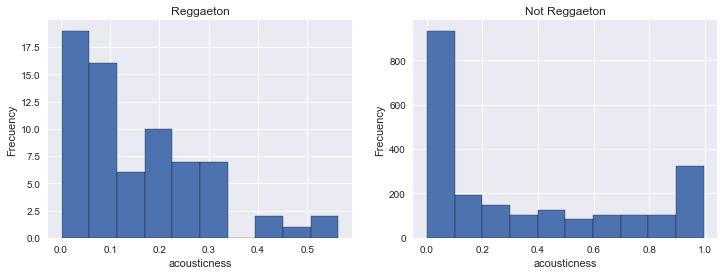

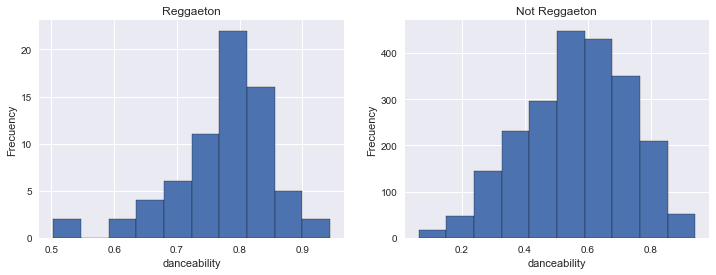

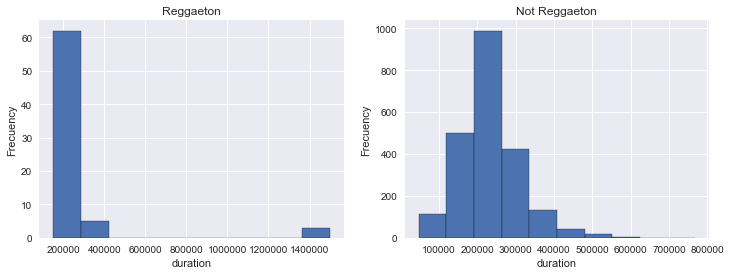

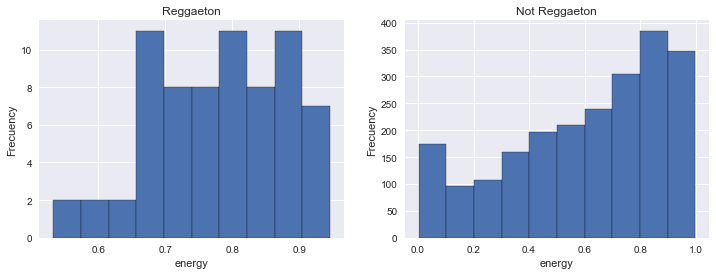

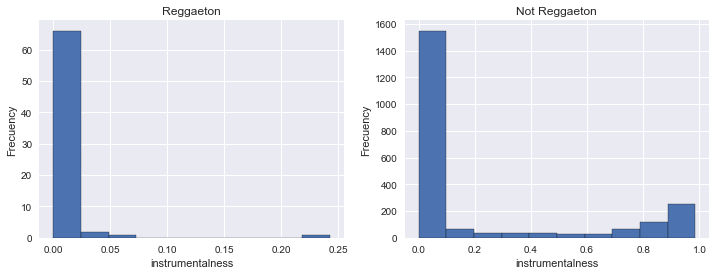

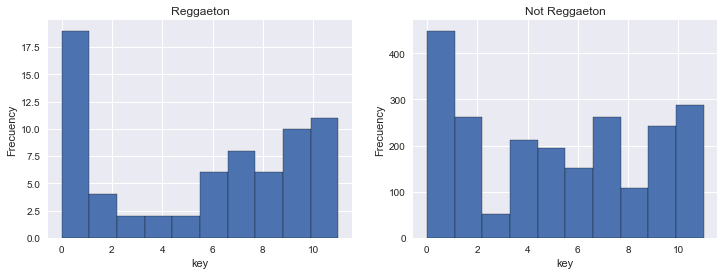

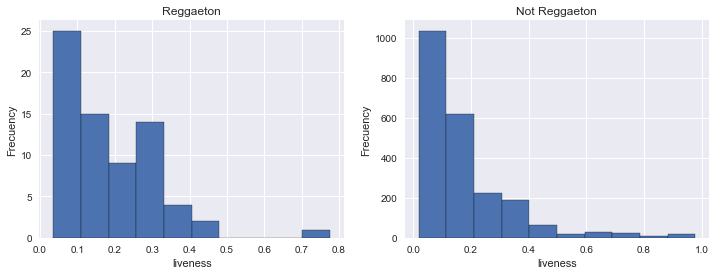

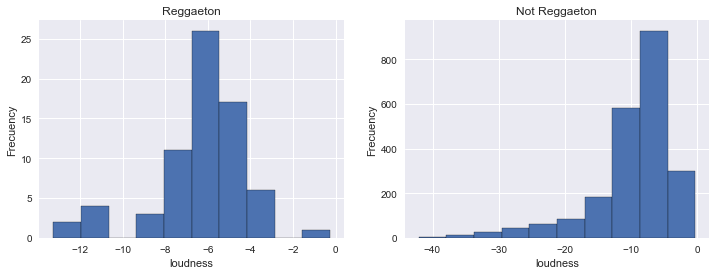

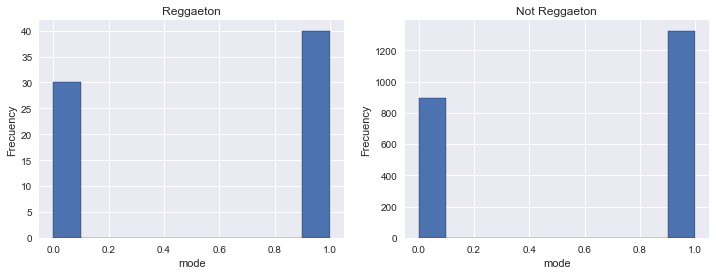

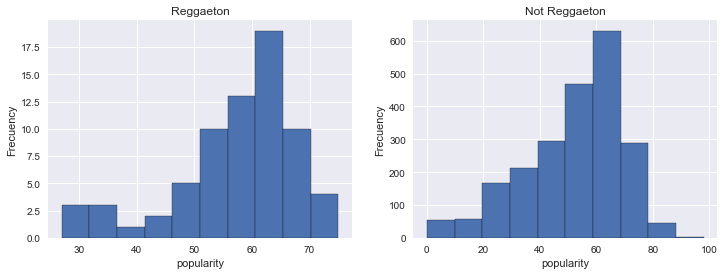

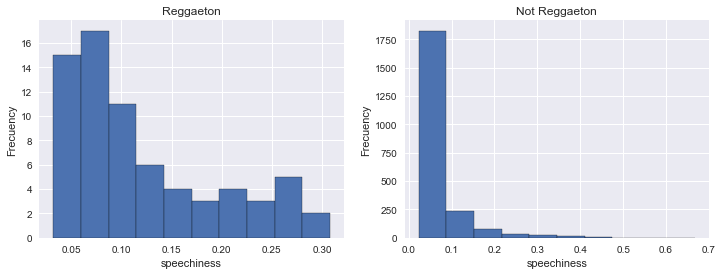

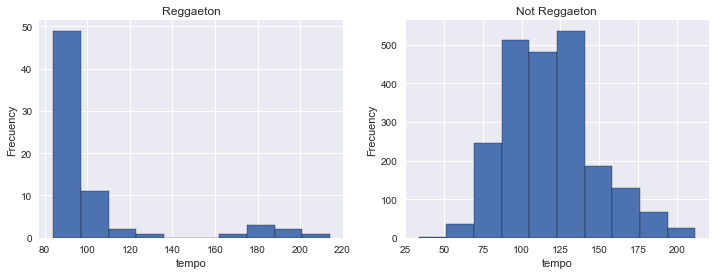

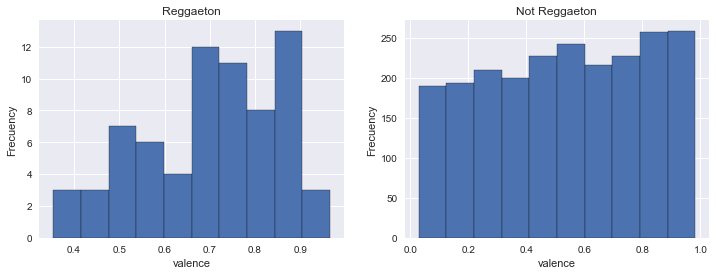

In [296]:

for item in df_reggaeton_for_plot:
    
    plot_two_hists(item,df_reggaeton,df_not_reggaeton,'Reggaeton','Not Reggaeton',item,'Frecuency')
    


A través de las gráficas podemos ver cuales son los atributos primordiales que distinguen una canción de reggaeton, y tambien discriminar aquellos que no pueden ayudarnos a diferenciarlas.

# Segunda parte del SpikeChallenge

- Como segunda parte del desafio, se nos pide consolidar los dos dataset en uno solo y generar un archivo CSV que contenga una marca indicando si la canción es un reggaeton o no. Como se nos pidió hacerlo en base a los data set, creo que la forma más sencilla es con la id asignada por los creadores del reto para identificar cada canción. Otra forma sería con el parametro sobrante en el dataset todotipo.
<br> 
<br> 
<br> 
- Debido a que la intención es crear un modelo de ML, decidí unir los dos dataset en uno solo omitiendo el atributo time_signature y las filas con missing data para darle homogeneidad al dataSet.

Si revisamos brevemente cada dataSet, podemos observar que a cada canción le fue asignada un Id unico, llamado id_new, el cuál en el data set reggaeton va desde 1 a 70, y en el dataSet todotipo, desde 71 a 2300, por lo tanto si queremos generar una marca, EN BASE A LOS DATA SET la mejor manera es crear dicha marca usando esos intervalos como referencia. Un incoveniente de este metodo sería agregar nuevas canciones .

In [297]:
print('Primer id_new del DataSet Reggaeton: ', df_reggaeton['id_new'].iloc[0])
print('Ultimo id_new del DataSet Reggaeton: ', df_reggaeton['id_new'].iloc[-1])
print('Primer id_new del DataSet todotipo:', df_not_reggaeton['id_new'].iloc[0])
print('Ultimo id_new del DataSet todotipo:', df_not_reggaeton['id_new'].iloc[-1])

Primer id_new del DataSet Reggaeton:  1
Ultimo id_new del DataSet Reggaeton:  70
Primer id_new del DataSet todotipo: 71
Ultimo id_new del DataSet todotipo: 2300


- Eliminamos time_signature de todotipo.

In [298]:
df_not_reggaeton = df_not_reggaeton.drop('time_signature',axis = 1)


- Vemos ahora que las columnas coinciden:


In [299]:
df_not_reggaeton.describe()

,Unnamed: 0,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,id_new
count,2222.000000,2222.000000,2222.000000,2222.000000,2222.000000,2222.000000,2222.000000,2222.000000,2222.000000,2222.000000,2222.000000,2222.000000,2222.000000,2222.000000,2222.000000
mean,1115.549955,52.102160,0.566439,0.607263,5.175518,-9.641344,0.596760,0.067720,0.346486,0.215211,0.179627,0.530849,118.338830,233872.923042,1185.549955
std,644.719929,17.425519,0.165887,0.282298,3.519774,6.141384,0.490659,0.063484,0.360734,0.351567,0.154093,0.275088,28.527313,77944.498354,644.719929
min,1.000000,0.000000,0.062700,0.001810,0.000000,-42.117000,0.000000,0.023100,0.000002,0.000000,0.018000,0.027900,33.579000,46667.000000,71.000000
25%,557.250000,42.000000,0.456000,0.406250,2.000000,-11.316000,0.000000,0.035500,0.021275,0.000005,0.089600,0.298000,97.411750,187160.250000,627.250000
50%,1114.500000,56.000000,0.579000,0.671000,5.000000,-8.017500,1.000000,0.045700,0.189000,0.001660,0.118500,0.538500,117.947000,225257.000000,1184.500000
75%,1674.750000,64.000000,0.690750,0.847000,8.000000,-5.699000,1.000000,0.069900,0.667250,0.328750,0.217750,0.767000,133.873250,272177.000000,1744.750000
max,2230.000000,98.000000,0.942000,0.998000,11.000000,-0.282000,1.000000,0.668000,0.996000,0.985000,0.978000,0.982000,211.893000,768507.000000,2300.000000


In [300]:
df_reggaeton.describe()

,Unnamed: 0,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,id_new
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,7.000000e+01,70.000000
mean,35.500000,56.957143,0.776000,0.778171,5.600000,-6.327571,0.571429,0.120620,0.158725,0.005461,0.189397,0.702671,105.910286,2.756467e+05,35.500000
std,20.351085,10.703427,0.080724,0.097774,3.696453,2.243060,0.498445,0.075096,0.132574,0.029874,0.128542,0.152090,28.554854,2.575437e+05,20.351085
min,1.000000,27.000000,0.503000,0.533000,0.000000,-13.268000,0.000000,0.032000,0.001650,0.000000,0.035400,0.354000,84.012000,1.516670e+05,1.000000
25%,18.250000,52.250000,0.743250,0.700250,1.000000,-7.128750,0.000000,0.064375,0.056025,0.000000,0.094475,0.582250,93.993500,1.964132e+05,18.250000
50%,35.500000,59.000000,0.792000,0.790000,6.500000,-6.031000,1.000000,0.090600,0.113000,0.000001,0.141000,0.722500,95.018500,2.195305e+05,35.500000
75%,52.750000,63.000000,0.827500,0.863500,9.000000,-4.959750,1.000000,0.161000,0.243500,0.000019,0.262500,0.830250,102.277750,2.509098e+05,52.750000
max,70.000000,75.000000,0.944000,0.946000,11.000000,-0.262000,1.000000,0.308000,0.563000,0.243000,0.776000,0.966000,214.058000,1.499600e+06,70.000000


In [301]:
df_consolidado = df_reggaeton.append(df_not_reggaeton,ignore_index=True)
df_consolidado.info()
df_consolidado.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2292 entries, 0 to 2291
Data columns (total 15 columns):
Unnamed: 0          2292 non-null int64
popularity          2292 non-null float64
danceability        2292 non-null float64
energy              2292 non-null float64
key                 2292 non-null float64
loudness            2292 non-null float64
mode                2292 non-null float64
speechiness         2292 non-null float64
acousticness        2292 non-null float64
instrumentalness    2292 non-null float64
liveness            2292 non-null float64
valence             2292 non-null float64
tempo               2292 non-null float64
duration            2292 non-null float64
id_new              2292 non-null int64
dtypes: float64(13), int64(2)
memory usage: 268.7 KB


Unnamed: 0          0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration            0
id_new              0
dtype: int64

Procedemos a agregar la marca según el id.

In [302]:
df_consolidado['Marca'] = np.where(df_consolidado['id_new'].between(0,70),1,0)
#1 para Reggaton 0 para todotipo

In [303]:
print(df_consolidado[['id_new','Marca']].iloc[69])
print(df_consolidado[['id_new','Marca']].iloc[70])



id_new    70
Marca      1
Name: 69, dtype: int64
id_new    71
Marca      0
Name: 70, dtype: int64


Ahora que verificamos que la marca se ha realizado de manera correcta, procedemos a guardar los datos en un archivo CSV.

In [304]:
path = os.getcwd()+'\\Spike+Challenge\\Spike Challenge\\df_consolidado.csv'
#Obtenemos el directorio actual donde estamos trabajando y la agregamos a la ubicación de los datos.
df_consolidado.to_csv(path,sep=',',index = False)

In [305]:
#Solo para confirmar la integridad de los datos vamos a leer los datos desde el archivo CSV que creamos.
df_datos = pd.read_csv('Spike+Challenge\\Spike Challenge\\df_consolidado.csv')
df_datos.head()

,Unnamed: 0,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,id_new,Marca
0,1,68.0,0.826,0.704,9.0,-7.527,1.0,0.1170,0.1890,0.000048,0.0617,0.741,94.013,205000.0,1,1
1,2,61.0,0.641,0.693,8.0,-7.327,1.0,0.1630,0.0169,0.000000,0.2190,0.899,214.058,184413.0,2,1
2,3,67.0,0.771,0.815,1.0,-5.423,0.0,0.0719,0.1610,0.000020,0.1890,0.524,94.016,205520.0,3,1
3,4,63.0,0.743,0.787,1.0,-5.402,1.0,0.2620,0.0352,0.000000,0.0732,0.719,192.117,172680.0,4,1
4,5,63.0,0.876,0.692,10.0,-6.429,1.0,0.1040,0.1280,0.000000,0.2490,0.757,95.032,227280.0,5,1


Podemos concliur de este ejercicio que la limpieza y homegeneidad de los datos nos ayuda a tener datos uniformes listos para el procesamiento.

# La tercera y cuarta parte del SpikeChallenge estará dividida en partes, donde entrenaremos el modelo y seguidamente lo evaluaremos.


En esta parte del desafio debemos entrenar uno o más modelos para clasificar si una canción es reggaeton o no según los parametros dados por spotify

# Entrenamiento del modelo : Decision Tree

In [306]:
train_data,test_data = train_test_split(df_datos,test_size = 0.20)
#Primero dividimos nuestros datos en Train data y test data

In [307]:
classifier = DecisionTreeClassifier(min_samples_split=150,class_weight='balanced')
atributos = ['acousticness','danceability','energy','speechiness','liveness','tempo','loudness']
#De acuerdo a las gráficas tomamos los valores más relevantes según nuestro criterio.

x_train = train_data[atributos]
y_train = train_data['Marca']

x_test = test_data[atributos]
y_test = test_data['Marca']

#Seleccionamos los atributos necesarios para la clasificación y el target o marca que queremos clasificar.

arbol = classifier.fit(x_train,y_train)

y_pred = classifier.predict(x_test)

# Evaluación, Decision Tree 

In [308]:
exactitud = accuracy_score(y_test,y_pred) * 100
print('La exactitud del clasificador es de : ', exactitud.round(2),'%')


La exactitud del clasificador es de :  85.84 %


Con esa medida solamente sabemos que el 97% de nuestras predicciones correctas, pero no nos dicen nada más, una manera muy conveniente de ver el perfomance es con una matriz de confusión. Los valores en la diagonal representan valores predecidos correctamente, y fuera de la diagonal falsos positivos o falsos negativos

             precision    recall  f1-score   support

          0       1.00      0.86      0.92       449
          1       0.12      0.90      0.22        10

avg / total       0.98      0.86      0.91       459



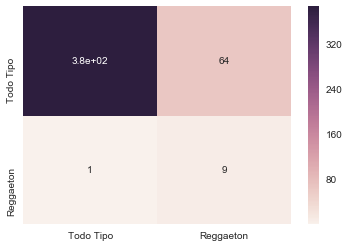

In [354]:
from sklearn.metrics import confusion_matrix

confusion = pd.DataFrame(confusion_matrix(y_test,y_pred),columns=['Todo Tipo','Reggaeton'],index =['Todo Tipo','Reggaeton'])
sns.heatmap(confusion, annot = True)
report_dt = classification_report(y_test,y_pred)
print(report_dt)

Con esta matriz podemos observar, que el clasificador predijo correctamente cuando los valores no eran Reggaeton, pero tiene problemas detectando canciones que son reggaeton, ya que de 9 canciones en el data set test, solo predijo correctamente 5 canciones. Con 4 falsos negativos, y 6 falsos positivos. Con esta metrica vemos que a pesar de obtener un acuraccy de 97% el algoritmo posiblemente no sea optimo para la clasificación de reggaeton, sin embargo, al realizar pruebas en dataset aislados, logró predecir correctamente más del 96% de las predicciones. Este algoritmo es facil de aplicar y además no necesita de tanto trabajo con los datos, lo que nos puede ayudar a realizar prototipos rápidos con nuestros datos. Una de las formas de mejorar el performance del modelo, sería teniendo un dataset mejor distribuido, donde existe mayor número de canciones de reggaeton y así el modelo discrimine mejor entre las dos clases, según articulo web ubicado en https://es.wikipedia.org/wiki/Matriz_de_confusi%C3%B3n

<blockquote> "Si en los datos de entrada el número de muestras de clases diferentes cambia mucho la tasa de error del clasificador no es representativa de lo bien que realiza la tarea el clasificador. Si por ejemplo hay 990 muestras de la clase 1 y sólo 10 de la clase 2, el clasificador puede tener fácilmente un sesgo hacia la clase 1. Si el clasificador clasifica todas las muestras como clase 1 su precisión será del 99%. Esto no significa que sea un buen clasificador, pues tuvo un 100% de error en la clasificación de las muestras de la clase 2"</blockquote>

Ahora como usaremos random forest, apoyandonos nuevamente en la librería Sckit

# Entrenamiento modelo: Random Forest
A continuacion usaremos random forest para realizar la clasificación.

In [310]:
from sklearn.ensemble import RandomForestClassifier

random_f = RandomForestClassifier(n_estimators = 1000, oob_score=True,random_state=12356,min_samples_split=105)

In [325]:
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_sample(x_train, y_train)



In [326]:
random_f.fit(X_res, y_res)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=105,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=True, random_state=12356, verbose=0,
            warm_start=False)

In [327]:
predicted = random_f.predict(x_test)
print(predicted)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [328]:
accuracy = accuracy_score(y_test,predicted)*100
print('La exactitud del clasificador es de : ', accuracy.round(2),'%')

La exactitud del clasificador es de :  97.82 %


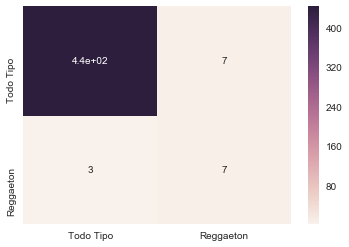

In [329]:
confusion2 = pd.DataFrame(confusion_matrix(y_test,predicted),columns=['Todo Tipo','Reggaeton'],index =['Todo Tipo','Reggaeton'])
sns.heatmap(confusion2, annot = True)

In [330]:
from sklearn.metrics import roc_auc_score

print(roc_auc_score(y_test,predicted))

report = classification_report(y_test,predicted)
print(report)


0.8422048997772829
             precision    recall  f1-score   support

          0       0.99      0.98      0.99       449
          1       0.50      0.70      0.58        10

avg / total       0.98      0.98      0.98       459



# Evaluacion modelo Random Forest

 Con el algoritmo Random Forest, que puede decirse es una version mejorada de decision Tree, vemos mejor performance del modelo, sin embargo, la cantidad de falsos negativos puede preocuparnos, ya que representan un alto porcentaje . Para manejar el problema de las clases inbalanceadas, se usó una libreria que permite hacer oversampling sobre la clase minoritaria. Nuevamente utilizamos la matriz de confusion para evaluar el performance del modelo, usamos está ya que nos permite comparar la diferencia con el modelo anterior, además que nos dá información muy importante sobre lo que ocurre en el momento de la clasificación. Con la clase clasification_report obtenemos metricas muy importante, que nos permite evaluar claramente que tanto está acertando nuestro modelo. 

Este algoritmo se eligió por que es uno de los algoritmos más faciles de entender como funcionan, además que proporciona bastante robustez al momento de las predicciones.

Para mejorar la performance, es necesario aplicar metodos para normalizar los atributos así como optimizar los parametros del clasificador.


# Conclusiones generales

Con los 2 modelos de Machine Learning obtuvimos problemas prediciendo las canciones de reggaeton, es mi parecer que esto se debe a que las clases estan inbalanceadas, teniendo solo el 3% de los datos siendo reggaeton. Es por esto que decidí realizar el siguiente experimento:

- A continuacion usaremos el algoritmo random forest con un data set más balanceado:


In [355]:
df_balanceado = df_reggaeton.append(df_not_reggaeton.iloc[0:200],ignore_index=True)
#solo agregamos 111 datos del dataFrame df_not_reggaeton
df_balanceado['Marca'] = np.where(df_balanceado['id_new'].between(0,70),1,0)




             precision    recall  f1-score   support

          0       0.95      0.97      0.96        39
          1       0.93      0.87      0.90        15

avg / total       0.94      0.94      0.94        54



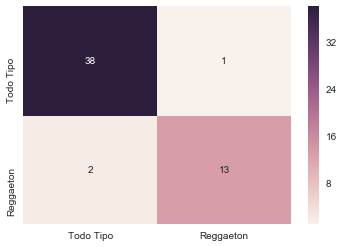

In [356]:
train_data_balanceado ,test_data_balanceado = train_test_split(df_balanceado,test_size = 0.20)

x_train_balanceado = train_data_balanceado[atributos]
y_train_balanceado = train_data_balanceado['Marca']

x_test_balanceado = test_data_balanceado[atributos]
y_test_balanceado = test_data_balanceado['Marca']

random_forest_balance = RandomForestClassifier(n_estimators = 500, oob_score=False,random_state=123456,min_samples_split=50)

random_forest_balance.fit(x_train_balanceado,y_train_balanceado)
predicted1 = random_forest_balance.predict(x_test_balanceado)
predicted1
report = classification_report(y_test_balanceado,predicted1)
print(report)

matriz_balanceada = pd.DataFrame(confusion_matrix(y_test_balanceado,predicted1),columns=['Todo Tipo','Reggaeton'],index =['Todo Tipo','Reggaeton'])
sns.heatmap(matriz_balanceada, annot = True)



In [357]:
efectividad = accuracy_score(y_test_balanceado,predicted1) * 100
print('La exactitud del modelo es de : ',efectividad.round(2),'%')
reportee = classification_report(y_test_balanceado,predicted1)
print(reportee)

La exactitud del modelo es de :  94.44 %
             precision    recall  f1-score   support

          0       0.95      0.97      0.96        39
          1       0.93      0.87      0.90        15

avg / total       0.94      0.94      0.94        54



Si bien, su efectividad se mantiene, vemos que con la matriz de confusion, podemos ver una prediccion correcta de los datos. Esto nos indica que existe un sesgo positivo con los datos anteriores, pero, debido a la cantidad de datos, la probabilidad de overfit es grande.

In [358]:
predic_reggaeton = random_forest_balance.predict(df_not_reggaeton[atributos])
df_not_reggaeton['predicion']=predic_reggaeton
df_not_reggaeton[df_not_reggaeton['predicion']==1].count()

Unnamed: 0          178
popularity          178
danceability        178
energy              178
key                 178
loudness            178
mode                178
speechiness         178
acousticness        178
instrumentalness    178
liveness            178
valence             178
tempo               178
duration            178
id_new              178
predicion           178
dtype: int64

Vemos que para el DataSet todo tipo la performance fue muy pobre, ya que en el dataSet todotipo (No reggaeton) predijo 215 resultados incorrectos, esto debido al overfit que mencioné anteriormente.

# Quinta parte del desafio, aplicar el modelo al dataSet data_test

En esta parte del desafio debemos aplicar el modelo elegido al data_test, despúes  de varios experimentos, y ya que tiene las metricas con mejor performance elegí usar random forest para la prediccion del data test.


In [359]:
#primero cargamos el archivo csv

df_data_test = pd.read_csv('Spike+Challenge\Spike Challenge\data_test.csv')

df_data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 18 columns):
Unnamed: 0                 50 non-null int64
popularity                 50 non-null int64
danceability               50 non-null float64
energy                     50 non-null float64
key                        50 non-null int64
loudness                   50 non-null float64
mode                       50 non-null int64
speechiness                50 non-null float64
acousticness               50 non-null float64
instrumentalness           50 non-null float64
liveness                   50 non-null float64
valence                    50 non-null float64
tempo                      50 non-null float64
duration                   50 non-null int64
time_signature             50 non-null int64
id_new                     50 non-null int64
marca_reggaeton            50 non-null int64
probabilidad_reggaeton     50 non-null float64
dtypes: float64(10), int64(8)
memory usage: 7.1 KB


In [360]:
prediccion = random_f.predict(df_data_test[atributos])
#Realizamos la prediccion 

proba_prediccion = random_f.predict_proba(df_data_test[atributos])
#Realizamos la probabilidad de prediccion de cada clase, y damos gracias a los metodos de scikitLearn!!

In [361]:
df_data_test['marca_reggaeton'] = prediccion

probabilidad = proba_prediccion[:,1] * 100

df_data_test['probabilidad_reggaeton '] = probabilidad.round(2)


path = os.getcwd()+'\\Spike+Challenge\\Spike Challenge\\data_test.csv'

df_data_test.to_csv(path,sep=',',index=False)


In [362]:
df_data_test.head(10)
#Para comprobar imprimimos el DataSet y verificamos que estén las marcas.

,Unnamed: 0,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,time_signature,id_new,marca_reggaeton,probabilidad_reggaeton
0,1,60,0.607,0.875,0,-4.434,1,0.0605,0.001140,0.007650,0.4670,0.4570,131.058,264520,4,2301,0,8.16
1,2,69,0.757,0.868,9,-9.326,1,0.0620,0.411000,0.002210,0.3550,0.8150,138.923,199200,4,2302,0,16.87
2,3,88,0.791,0.866,6,-4.236,1,0.0497,0.248000,0.000005,0.0696,0.7100,96.011,217080,4,2303,1,61.57
3,4,70,0.589,0.484,7,-6.622,1,0.0266,0.489000,0.000000,0.1130,0.0927,120.258,269973,4,2304,0,0.57
4,5,61,0.617,0.771,10,-5.586,0,0.1120,0.038400,0.000003,0.1620,0.5530,180.002,267747,4,2305,0,8.52
5,6,75,0.502,0.972,10,-3.960,0,0.0793,0.000068,0.000702,0.0627,0.7290,138.019,197280,4,2306,0,1.63
6,7,60,0.828,0.642,1,-7.399,1,0.0821,0.306000,0.000714,0.1030,0.5450,97.986,217966,4,2307,0,48.78
7,8,71,0.770,0.790,10,-5.453,0,0.0814,0.139000,0.000000,0.0829,0.8720,93.970,195453,4,2308,1,96.91
8,9,73,0.547,0.691,4,-13.553,0,0.0369,0.015000,0.105000,0.1440,0.6670,137.148,261933,4,2309,0,1.22
9,10,76,0.613,0.873,7,-6.376,0,0.0449,0.003970,0.001110,0.3670,0.3920,129.989,234813,4,2310,0,4.25
